---
---

**Papagoudis Georgios**

- **Network Analysis: Bipartite Graphs, Network Metrics, Centrality, Community Detection**

Advanced Computational Methods

Technical University of Munich

Hochschule für Politik München

Computational Social Science


---
---

## Data Description

For this assignment, we are going to analyze data about

The dataset corresponds to the contact relations between students in a high school in Marseilles, France, in December 2013.

The dataset comprises two CSV files (given to you in `data` folder):
- `contacts.csv`
- `metadata.csv`

**Contacts**
This table gives the contacts of the students of 9 classes during 5 days in Dec. 2013, as measured by the [SocioPatterns](http://www.sociopatterns.org/) infrastructure.
The file represents the active contacts during each day:
- `i` and `j` are the anonymous IDs of the persons in contact,
- `date` is the day during which this contact was active.

**Metadata**
This file provides additional information about students:
- `id`: a unique identifier for each student
- `class`: the class of the student
- `gender`: the gender of the student

Across the files, students are identified through the `id` key. That is, in `contacts` file, the columns `i` and `j` correspond to the student's `id`.

Reference Paper:
* R. Mastrandrea, J. Fournet, A. Barrat, *[Contact patterns in a high school: a comparison between data collected using wearable sensors, contact diaries and friendship surveys.](https://doi.org/10.1371%2Fjournal.pone.0136497)* PLoS ONE 10(9): e0136497 (2015)

Original Dataset:
* http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/

## Part 1. Data Exploration (25 points)

### Part 1.1  (15 / 25 Points)

In [ ]:
import pandas as pd
contacts = pd.read_csv('/content/contacts.csv')
metadata = pd.read_csv('/content/metadata.csv')
contacts

,i,j,date
0,454,640,2013-12-02
1,1,939,2013-12-02
2,185,258,2013-12-02
3,55,170,2013-12-02
4,9,453,2013-12-02
...,...,...,...
11208,9,120,2013-12-06
11209,525,687,2013-12-06
11210,219,687,2013-12-06
11211,280,513,2013-12-06


In [ ]:
metadata

,id,class,gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F
...,...,...,...
324,58,PC*,Unknown
325,209,PC*,Unknown
326,979,2BIO2,Unknown
327,205,2BIO3,M


Without joining the tables, answer the following questions:
1. Find the relative frequency (percentage) of contacts per day.


In [ ]:
contacts.isna().sum()

,0
i,0
j,0
date,0


In [ ]:
# There are no 'NaN' values in any column. Thus, we consider the complete
# dataset for the calculation of the relative frequency of contacts per day:
contacts[['date']].value_counts(normalize=True)

,proportion
date,
2013-12-03,0.229466
2013-12-02,0.199946
2013-12-05,0.192812
2013-12-04,0.192723
2013-12-06,0.185053


In [ ]:
# We oserve that the amount of contacts is almost equally distributed among the 5 recorded days

2. Find the relative frequency (percentage) of genders.


In [ ]:
metadata.isna().sum()

,0
id,0
class,0
gender,0


In [ ]:
# There are no 'NaN' values in any column. Thus, we consider the complete
# dataset for the calculation of the relative frequency of genders:
metadata[['gender']].value_counts(normalize=True)

,proportion
gender,
M,0.534954
F,0.443769
Unknown,0.021277


In [ ]:
# We observe that the sample is quite homogenous with respect to gender as roughly half of students are male(53%) and the other half female(44%). Around 2% of students are unknown.


3. Make a bar plot of the number of students per class.


In [ ]:
metadata['class'].value_counts()

,count
class,
PC,44
2BIO3,40
PC*,40
MP*2,38
2BIO1,36
2BIO2,35
PSI*,34
MP,33
MP*1,29


<Axes: xlabel='class'>

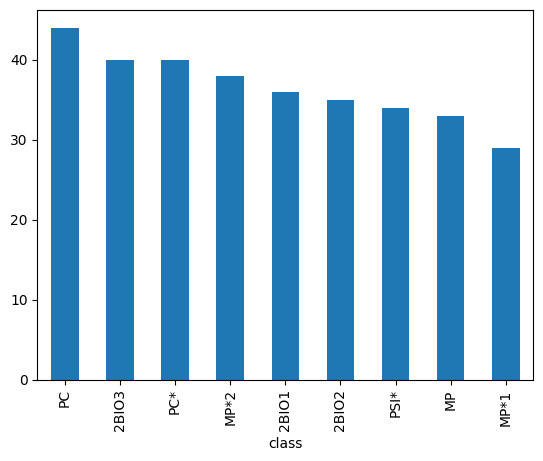

In [ ]:
metadata['class'].value_counts().plot(kind='bar')

4. Excluding 'Unknown' gender, find the (absolute) frequancy of gender per class. Then, using an appropriate statistical test, check whether `gender` and `class` variables are independent.


In [ ]:
gender_class_cont_tbl = pd.crosstab(metadata[metadata['gender'] != 'Unknown']['gender'], metadata[metadata['gender'] != 'Unknown']['class'])
gender_class_cont_tbl

class,2BIO1,2BIO2,2BIO3,MP,MP*1,MP*2,PC,PC*,PSI*
gender,,,,,,,,,
F,28,21,32,11,6,6,18,14,10
M,8,13,8,18,23,32,26,24,24


In [ ]:
import scipy.stats as stats
stats.chi2_contingency(gender_class_cont_tbl)

Chi2ContingencyResult(statistic=64.45337893073548, pvalue=6.189259756415124e-11, dof=8, expected_freq=array([[16.32298137, 15.41614907, 18.13664596, 13.14906832, 13.14906832,
        17.22981366, 19.95031056, 17.22981366, 15.41614907],
       [19.67701863, 18.58385093, 21.86335404, 15.85093168, 15.85093168,
        20.77018634, 24.04968944, 20.77018634, 18.58385093]]))

In [ ]:
# H0: Categories 'gender' and 'class' are independent
# We observe that the 'expected contigency table'(under the H0 hypothesis) is way different than the observed one.
# In particular, as p-value = 6.189259756415124e-11 << 1,
# we reject the H0 in any practical level of significance, Thus, we conclude:
# The categorical variables 'gender' and 'class' are dependent
# Classes: 2BIO1	2BIO2	2BIO3 tend to be more female populated
# Classes: 	MP	MP*1	MP*2	PC	PC*	PSI* tend to be more male populated

5. Are there any students without contacts at all? If yes, find them (with class and gender).

In [ ]:
# the id's of students that haven't sent any message:
for id in metadata['id']:
  if id not in contacts['i'].values:
    print(id)

991
478
939
1894
959
882
998
2
938


In [ ]:
# the id's of students that haven't received any message:
for id in metadata['id']:
  if id not in contacts['j'].values:
    print(id)

62
478
3
165
1
39
20
32
4
9
2
34


In [ ]:
# the id's of students that haven't sent AND haven't received any message:
for id in metadata['id']:
  if id not in contacts['i'].values and id not in contacts['j'].values:
    print(metadata[metadata['id']==id])

     id  class gender
37  478  2BIO2      F
     id class gender
264   2   PC*      M


### Part 1.2. Global Level Homogeneity  (10 / 25 Points)

Construct a dataframe that extends the `contacts` table by adding the gender and class of the students `i` and `j`.

Then, add two new boolean (logical) columns:
- `same_class`: True if the students `i` and `j` are in the same class, False otherwise.
- `same_gender`: True if the students `i` and `j` have the same gender, False otherwise.

The dataframe should look like:

|   | i   | j    |  date      |  class_i |gender_i | class_j |  gender_j | same_class | same_gender |
|--:|----:|-----:|-----------:|---------:|--------:|--------:|----------:|-----------:|------------:|
| 0 | 454 |  640 | 2013-12-02 |       MP |       F |      MP |         M |       True |       False |
| 1 | 454 |  640 | 2013-12-03 |       MP |       F |      MP |         M |       True |       False |
| 2 | 454 |  640 | 2013-12-04 |       MP |       F |      MP |         M |       True |       False |
| 3 | 454 |  640 | 2013-12-05 |       MP |       F |      MP |         M |       True |       False |
| 4 |   1 |  640 | 2013-12-02 |    2BIO3 |       M |      MP |         M |      False |        True |




In [ ]:
contacts_meta=contacts.merge(metadata, left_on ='i',right_on='id').merge(metadata, left_on ='j',right_on='id').drop(columns=['id_x','id_y'])
contacts_meta.rename(columns={'class_x':'class_i','gender_x':'gender_i','class_y':'class_j','gender_y':'gender_j'},inplace=True)
contacts_meta['same_class']=contacts_meta.apply(lambda row:True if row['class_i']==row['class_j'] else False,axis=1)
contacts_meta['same_gender']=contacts_meta.apply(lambda row:True if row['gender_i']==row['gender_j'] else False,axis=1)
contacts_meta

,i,j,date,class_i,gender_i,class_j,gender_j,same_class,same_gender
0,454,640,2013-12-02,MP,F,MP,M,True,False
1,1,939,2013-12-02,2BIO3,M,2BIO3,M,True,True
2,185,258,2013-12-02,PC*,M,PC*,F,True,False
3,55,170,2013-12-02,2BIO3,F,2BIO3,F,True,True
4,9,453,2013-12-02,PC,M,PC,M,True,True
...,...,...,...,...,...,...,...,...,...
11208,9,120,2013-12-06,PC,M,PC,F,True,False
11209,525,687,2013-12-06,MP,F,MP,M,True,False
11210,219,687,2013-12-06,MP,M,MP,M,True,True
11211,280,513,2013-12-06,MP*1,F,MP*1,M,True,False


In [ ]:
# We have included also the students with unknown gender in order to take into account all the interactions.
# For a contact between 'unknown-unknown','unknown-F/M','F/M-unknown'--> value of 'same_gender' is True, False, False respectively.

With this new dataframe, answer the following questions:

1. With resepect to **gender**, what is the percentage of homogeneous contacts (between students of the same **gender**) ?

In [ ]:
a=pd.crosstab(contacts_meta['gender_i'], contacts_meta['gender_j'])
a

gender_j,F,M,Unknown
gender_i,,,
F,2882,2078,29
M,2108,3701,64
Unknown,104,235,12


In [ ]:
# (Excluding contacts from/to unknown gender)the percentage of homogeneous contacts with resepect to gender is:
# (FF+MM)/(FF+FM+MF+MM)*100% =
print((a['F'][0]+a['M'][1])/(a['F'][0]+a['F'][1]+a['M'][0]+a['M'][1])*100,'%')

61.12916705357973 %


<ipython-input-21-e1b79485f22d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((a['F'][0]+a['M'][1])/(a['F'][0]+a['F'][1]+a['M'][0]+a['M'][1])*100,'%')


In [ ]:
# We see that 61% of contacts have been contacted by students of the same gender.

2. With resepect to **class**, what is the percentage of homogeneous contacts (between students of the same **class**) ?

In [ ]:
contacts_meta['same_class'].value_counts(normalize=True)

,proportion
same_class,
True,0.804869
False,0.195131


In [ ]:
# We see that 80% of the contacts have been contacted by students that both belong to the same class.

3. With resepect to **gender** and **class**, what is the percentage of homogeneous contacts (between students of the same **class** and the same **gender**) ?

In [ ]:
# As can be seen from:
pd.crosstab(contacts_meta['gender_i'], contacts_meta['gender_j'])

gender_j,F,M,Unknown
gender_i,,,
F,2882,2078,29
M,2108,3701,64
Unknown,104,235,12


In [ ]:
# Only a small part of contacts includes some individual with unknown gender.
# To perform our analysis we must neglect this part from our data.
# As this is a relative very small part of the data(and also representative of the true population)
# we expect that our result will be still trustable.

In [ ]:
# So we merge again the 'contacts' and 'metadata'
# but this time we do not include any contacts with 'unknown' gender.

In [ ]:
metadata_f_m = metadata_filtered=metadata[metadata['gender']!='Unknown']


In [ ]:
contacts_meta_f_m=contacts.merge(metadata_f_m, left_on ='i',right_on='id').merge(metadata_f_m, left_on ='j',right_on='id').drop(columns=['id_x','id_y'])
contacts_meta_f_m.rename(columns={'class_x':'class_i','gender_x':'gender_i','class_y':'class_j','gender_y':'gender_j'},inplace=True)
contacts_meta_f_m['same_class']=contacts_meta_f_m.apply(lambda row:True if row['class_i']==row['class_j'] else False,axis=1)
contacts_meta_f_m['same_gender']=contacts_meta_f_m.apply(lambda row:True if row['gender_i']==row['gender_j'] else False,axis=1)
contacts_meta_f_m

,i,j,date,class_i,gender_i,class_j,gender_j,same_class,same_gender
0,454,640,2013-12-02,MP,F,MP,M,True,False
1,1,939,2013-12-02,2BIO3,M,2BIO3,M,True,True
2,185,258,2013-12-02,PC*,M,PC*,F,True,False
3,55,170,2013-12-02,2BIO3,F,2BIO3,F,True,True
4,9,453,2013-12-02,PC,M,PC,M,True,True
...,...,...,...,...,...,...,...,...,...
10764,9,120,2013-12-06,PC,M,PC,F,True,False
10765,525,687,2013-12-06,MP,F,MP,M,True,False
10766,219,687,2013-12-06,MP,M,MP,M,True,True
10767,280,513,2013-12-06,MP*1,F,MP*1,M,True,False


In [ ]:

# Now with using the filtered data 'contacts_meta_f_m',
# we get the same answer for Question 1

In [ ]:
contacts_meta_f_m['same_gender'].value_counts()

,count
same_gender,
True,6583
False,4186


In [ ]:
contacts_meta_f_m['same_gender'].value_counts(normalize=True)

,proportion
same_gender,
True,0.611292
False,0.388708


In [ ]:
# And very close (but as expected not exactly the same!!) results for Question 2:
contacts_meta_f_m['same_class'].value_counts(normalize=True)

,proportion
same_class,
True,0.805274
False,0.194726


In [ ]:
# Now we proceed with Question 3 using 'contacts_meta_f_m'
#
pd.crosstab(contacts_meta_f_m['same_class'], contacts_meta_f_m['same_gender'])


same_gender,False,True
same_class,,
False,933,1164
True,3253,5419


In [ ]:
# from the total 10769 contacts between students of known gender 5419 contacts
# correspont to contacts between pairs that belong to the same class and have the same gender.
# Thus, the percentage of contacts between students of the same class and the same gender is
print(100*5419/10769,'%')

50.320364007800165 %


In [ ]:
# About one half of the contacts belong to this category.

## Part 2. Global Network  (35 Points)

In this part, you are going to costruct a global contact network (ignoring the temporal dimension), in which nodes represent students, and two students are connected if there is (at least) a contact between them (regardless of the date).

1. Create an empty graph.
2. Add the nodes along with their attributes (class and gender).
3. Add the edges (with no attributes).

**Note 1**: the contact relation is not directed,  i.e., `i` is connected to `j` also means that `j` is connected to `i`; in other words, we say that there is a connection between `i` and `j`.

**Note 2**: Although it is possible to let the network be weighted if we consider the frequency of contacts (number of days) as edge weights, we are not going to do this in this part.
That is, the constructed network should be **un**weighted.

**Note 3**: some processing is needed to prepare the edge list: exclude the date, and drop the duplicates.

**Note 4**: the word "class" is a reserved word in Python, so don't use it as a variable name.

1. Create an empty graph.

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

2. Add the nodes along with their attributes (class and gender).


In [ ]:
node_list =[]
for i in range(len(metadata['id'])):
  node_list.append((metadata['id'][i],{'class':metadata['class'][i],'gender':metadata['gender'][i]}))
G.add_nodes_from(node_list)

3. Add the edges (with no attributes).

In [ ]:
contacts_filtered=contacts.drop(columns=['date'])
contacts_filtered.drop_duplicates(inplace=True)
contacts_filtered.index=range(len(contacts_filtered))
contacts_filtered
edge_list = []
for x  in range(len(contacts_filtered)):
  edge_list.append((contacts_filtered['i'][x],contacts_filtered['j'][x]))
G.add_edges_from(edge_list)

###  Part 2.1.  Network-Level Statistics (10 / 35 Points)

1. Once the network is created, find the network size (number of nodes and number of edges) and its density.



In [ ]:
print('nodes:',len(G.nodes()))
print('edges:',len(G.edges()))
density=nx.density(G)
print('density:',density)

nodes: 329
edges: 5818
density: 0.1078286010823634


2. Is the network connected? Are there isolate nodes (without contacts)? If yes, remove them from the network, then find again the size and density. Do you observe any changes?

In [ ]:
nx.is_connected(G)

False

In [ ]:
# the network is disconnected

In [ ]:
for k in G.degree:
  if k[1]==0:
    print('node',k[0],'is isolated')


node 478 is isolated
node 2 is isolated


In [ ]:
G.remove_nodes_from([2,478])
for k in G.degree:
  if k[1]==0:
    print('node',k[0],'is isolated')


In [ ]:
nx.is_connected(G)

True

In [ ]:
# After removal of nodes 2 and 478, the network has no isolated nodes.
# Additionally it is now connected.
print('nodes:',len(G.nodes()))
print('edges:',len(G.edges()))
density=nx.density(G)
print('density:',density)

nodes: 327
edges: 5818
density: 0.10915367441511416


In [ ]:
# Changes: 2 less nodes , network now is connected, (slightly) increased density

3. Now, calculate the following statistics, rounding to the 3rd decimal:    
    1. Average Clustering coefficient
    2. Transitivity
    3. Average shortest path length
    4. Diameter (maximum distance between two nodes) and radius

In [ ]:
# 1. Average Clustering coefficient
round(nx.average_clustering(G),3)

0.504

In [ ]:
# 2. Transitivity
round(nx.transitivity(G),3)

0.444

In [ ]:
# 3. Average shortest path
round(nx.average_shortest_path_length(G),3)

2.159

In [ ]:
# 4. Diameter and radius
print('diameter:',nx.diameter(G))
print('radius:',nx.radius(G))

diameter: 4
radius: 3


### Part 2.2. Node-Level Statistics (10 / 35 Points)

Next, let's look into the nodes more closely.
For each node, find the following statistics:
- degree
- local clustering coefficient
- eccentricity
- closeness centrality
- betweenness centrality

The results should be arragned in a dataframe which looks like this:

|   |  id | class | gender | degree | clustring | ecc | closeness | betweenness |
|--:|----:|------:|-------:|-------:|----------:|----:|----------:|------------:|
| 0 | 650 | 2BIO1 |      F |     39 |  0.430499 |   3 |  0.445964 |    0.002183 |
| 1 | 498 | 2BIO1 |      F |     44 |  0.392178 |   3 |  0.459803 |    0.005193 |
| 2 | 627 | 2BIO1 |      F |     22 |  0.640693 |   3 |  0.408010 |    0.000221 |
| 3 | 857 | 2BIO1 |      F |     24 |  0.525362 |   3 |  0.420103 |    0.001025 |
| 4 | 487 | 2BIO1 |      F |     40 |  0.412821 |   3 |  0.491704 |    0.003989 |

**Hint**: It would be easier to use dictionaries with which you can create new columns.

**Hint**: Remember to exclude isolate nodes.



In [ ]:
degree =dict(sorted(dict(nx.degree(G)).items()))
clustering = dict(sorted(dict(nx.clustering(G)).items()))
eccentricity = dict(sorted(dict(nx.eccentricity(G)).items()))
closeness = dict(sorted(dict(nx.closeness_centrality(G)).items()))
betweenness =  dict(sorted(dict(nx.betweenness_centrality(G)).items()))

In [ ]:
list= []
for n in degree.keys():
  list.append((n,degree[n],clustering[n],eccentricity[n],closeness[n],betweenness[n]))
nodes_stats = pd.DataFrame(list, columns=['id','degree','clustering','ecc','closeness','betweenness'] )
nodes_stats


,id,degree,clustering,ecc,closeness,betweenness
0,1,23,0.743083,3,0.425587,0.000864
1,3,56,0.346753,3,0.517460,0.008974
2,4,35,0.475630,3,0.461103,0.002425
3,9,69,0.321824,3,0.541528,0.021033
4,14,38,0.534851,4,0.470418,0.002487
...,...,...,...,...,...,...
322,1805,38,0.480797,3,0.500768,0.003112
323,1819,31,0.649462,3,0.461756,0.000703
324,1828,29,0.586207,3,0.466381,0.000938
325,1870,15,0.466667,4,0.434088,0.000736


In [ ]:
nodes_class_gender_stats = metadata[metadata['id'].isin(nodes_stats['id'])].merge(nodes_stats, on='id')
nodes_class_gender_stats

,id,class,gender,degree,clustering,ecc,closeness,betweenness
0,650,2BIO1,F,39,0.430499,3,0.445964,0.002183
1,498,2BIO1,F,44,0.392178,3,0.459803,0.005193
2,627,2BIO1,F,22,0.640693,3,0.408010,0.000221
3,857,2BIO1,F,24,0.525362,3,0.420103,0.001025
4,487,2BIO1,F,40,0.412821,3,0.491704,0.003989
...,...,...,...,...,...,...,...,...
322,58,PC*,Unknown,52,0.406486,3,0.522436,0.008098
323,209,PC*,Unknown,18,0.797386,4,0.395152,0.000077
324,979,2BIO2,Unknown,20,0.652632,4,0.405473,0.000142
325,205,2BIO3,M,39,0.481781,3,0.476608,0.002619


Using this dataframe, answer the following questions:

1. Find the top 5 central nodes based on closeness.


In [ ]:
nodes_class_gender_stats.sort_values(by='closeness',ascending=False).head(5)

,id,class,gender,degree,clustering,ecc,closeness,betweenness
147,1518,MP*2,M,84,0.227194,3,0.566957,0.030245
155,1332,MP*2,F,77,0.229665,3,0.560137,0.025534
301,605,MP,M,72,0.262520,3,0.550676,0.021418
74,106,2BIO3,F,87,0.255547,3,0.549747,0.026277
232,45,PC,F,62,0.335801,3,0.547899,0.014779


2. Find the top 5 central nodes based on betweenness.


In [ ]:
nodes_class_gender_stats.sort_values(by='betweenness',ascending=False).head(5)

,id,class,gender,degree,clustering,ecc,closeness,betweenness
147,1518,MP*2,M,84,0.227194,3,0.566957,0.030245
74,106,2BIO3,F,87,0.255547,3,0.549747,0.026277
155,1332,MP*2,F,77,0.229665,3,0.560137,0.025534
301,605,MP,M,72,0.262520,3,0.550676,0.021418
213,9,PC,M,69,0.321824,3,0.541528,0.021033


3. With a suitable plot, show the relation between `closeness` and `betweenness`. Find the correlation between them. What can you tell?


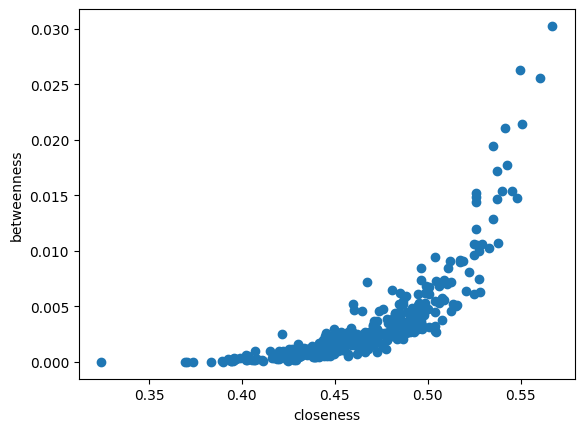

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(nodes_class_gender_stats['closeness'],nodes_class_gender_stats['betweenness'])
plt.xlabel('closeness')
plt.ylabel('betweenness')
plt.show()

In [ ]:
# We observe a non-linear relationship: betweenness ~ exp(closeness)
corr=nodes_class_gender_stats['closeness'].corr(nodes_class_gender_stats['betweenness'])
print('correlation:',corr)

correlation: 0.7732771858412055


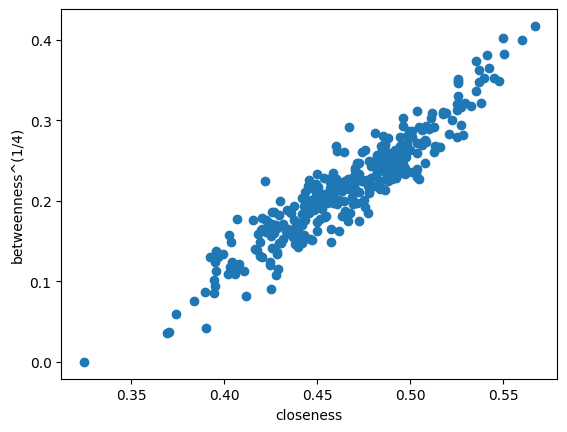

In [ ]:
# As correlation is relatively far from 0, this is a strong indication that the 2 variables are related.
# However, correlation captures only the linear relationship between the two.
# To demonstrate that we can assume a nonlinear functional form of betweenness~closeness^4(as inclened from the scatterplot).
# Now the correlation is expected to be way closer to 1. And indeed it is!
import math
nodes_class_gender_stats['betweenness^(1/4)'] = nodes_class_gender_stats['betweenness'].apply(lambda x: math.sqrt(math.sqrt(x)))

plt.scatter(nodes_class_gender_stats['closeness'],nodes_class_gender_stats['betweenness^(1/4)'])
plt.xlabel('closeness')
plt.ylabel('betweenness^(1/4)')
plt.show()

In [ ]:
corr=nodes_class_gender_stats['closeness'].corr(nodes_class_gender_stats['betweenness^(1/4)'])
print('correlation:',corr)

correlation: 0.9343878621019858


In [ ]:
# We drop the extra column...
nodes_class_gender_stats.drop(columns=['betweenness^(1/4)'],inplace=True)

4. Find the average degree per class. Sort them from highest to lowest.


In [ ]:
nodes_class_gender_stats.groupby('class')['degree'].mean().sort_values(ascending=False)

,degree
class,
2BIO3,41.575000
PC,40.386364
MP*2,38.763158
PC*,36.974359
MP,36.484848
2BIO2,35.294118
2BIO1,32.222222
PSI*,28.970588
MP*1,25.241379


5. With suitable visualizations and statistical tests, compare males and females are in terms of:
    - degree
    - local clustering coefficient

In [ ]:
nodes_class_gender_stats.groupby('gender')['degree'].mean()

,degree
gender,
F,36.482759
M,34.885714
Unknown,34.428571


In [ ]:
# We ignore results relevant to 'unknown' gender
# there is a slight difference in the expected degree for Females and Males.
# But is the difference statisticall significant?

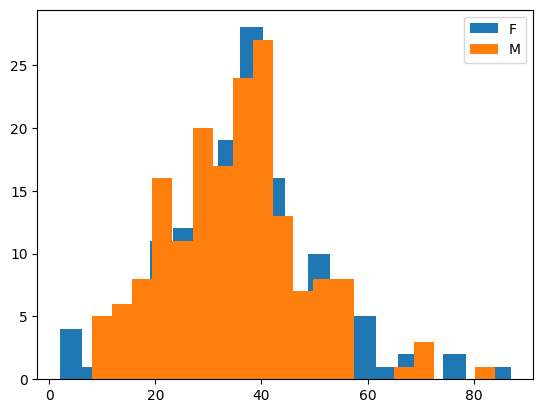

In [ ]:
plt.hist(nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='F'],bins=20)
plt.hist(nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='M'],bins=20)
plt.legend(['F','M'])
plt.show()

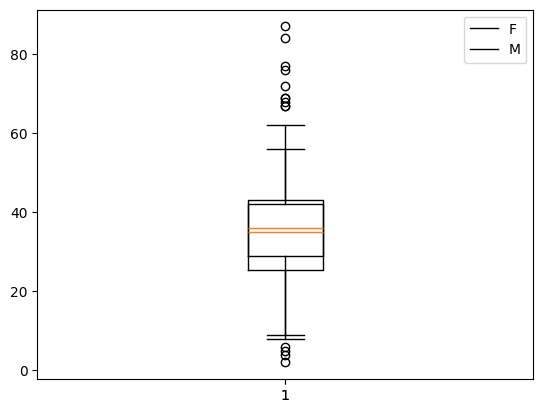

In [ ]:
plt.boxplot(nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='F'])
plt.boxplot(nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='M'])
plt.legend(['F','M'])

In [ ]:
# Visually we do not expect a significant difference of the expected degree between the two genders.

In [ ]:
# H0: 'Mean degree of females' = 'Mean degree of males'. H1: =!
tstat, pval = stats.ttest_ind(nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='F'],nodes_class_gender_stats['degree'][nodes_class_gender_stats['gender']=='M'])
print('pval:',pval)

pval: 0.2950093002042894


In [ ]:
# As pval>>0.01, we fail to reject the H0. The differnece is not statistically significant.

In [ ]:
# There is also an observed differnece between the mean local clustering coefficient of different genders.
# Is thi sstatistically significant?
nodes_class_gender_stats.groupby('gender')['clustering'].mean()

,clustering
gender,
F,0.491827
M,0.511991
Unknown,0.533238


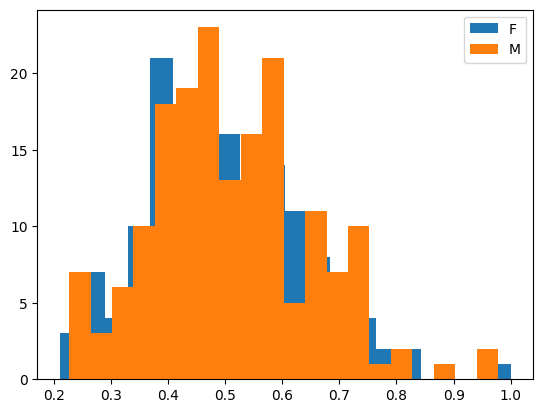

In [ ]:
plt.hist(nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='F'],bins=20)
plt.hist(nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='M'],bins=20)
plt.legend(['F','M'])
plt.show()

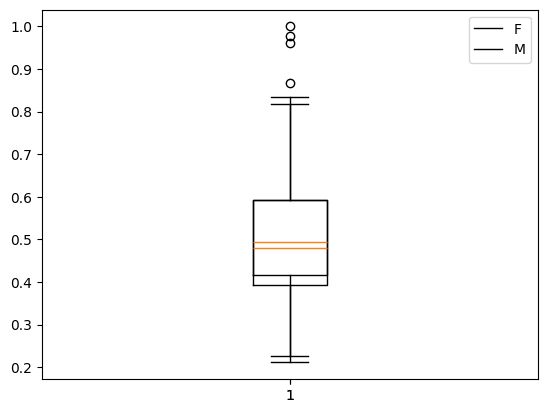

In [ ]:
plt.boxplot(nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='F'])
plt.boxplot(nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='M'])
plt.legend(['F','M'])
plt.show()

In [ ]:
# H0: 'Mean local clustering of females' = 'Mean local clustering of males' . H1: =!

tstat, pval = stats.ttest_ind(nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='F'],nodes_class_gender_stats['clustering'][nodes_class_gender_stats['gender']=='M'])
print('pval:',pval)

pval: 0.19944399180931807


In [ ]:
# # As pval>>0.01, we fail to reject the H0. The differnece is not statistically significant.

1. Create a function, named `neighbor_atts`, which takes as parameter a single node `u`.
The function should find the node neighbors, and their attributes (gender & class),
and returns two numbers:
- `same_gender`: the count of neighbors having the same gender as `u`
- `same_class`: the count of neighbors having the same class as `u`

### Part 2.3.  Node Level Homogeneity (15 / 35 Points)

1. Create a function, named `neighbor_atts`, which takes as parameter a single node `u`.
The function should find the node neighbors, and their attributes (gender & class),
and returns two numbers:
- `same_gender`: the count of neighbors having the same gender as `u`
- `same_class`: the count of neighbors having the same class as `u`

**hint**: you can get the set of neighbor nodes of a node `u` in a graph `G` using:
    - `G.neighbors(u)`
    
*Example run*: `neighbor_atts(520)` returns `(8, 9)`
where 8 is the number of same-gender neighbors of the input node 520, while 9 is the number of its same-class neighbors.
BTW, node 520 is Female and in class 'MP', it has 15 neighbors out of which 8 are of the same gender (females too), and 9 are in the same class 'MP'.



In [ ]:
def  neighbor_atts(u):
  k = nodes_class_gender_stats[nodes_class_gender_stats['id']==u]['gender'].values[0]
  l = nodes_class_gender_stats[nodes_class_gender_stats['id']==u]['class'].values[0]
  list=[]
  for i in G.neighbors(u):
    list.append(i)
  df_gender = nodes_class_gender_stats[nodes_class_gender_stats['id'].isin(list)]['gender']
  df_class = nodes_class_gender_stats[nodes_class_gender_stats['id'].isin(list)]['class']
  same_class=0
  for j in df_class:
    if j==l:
      same_class+=1
  same_gender=0
  for j in df_gender:
    if j==k:
      same_gender+=1
  return same_gender , same_class

In [ ]:
neighbor_atts(520)

(8, 9)

2. Now, use this function to calculate these two numbers for all nodes. Thus, two new columns (`n_same_gender` and `n_same_class`) should be added to the previous dataframe.


In [ ]:
list=[]
for i in nodes_class_gender_stats['id']:
  list.append(neighbor_atts(i))
DF = pd.DataFrame(list,columns =['n_same_gender', 'n_same_class'])
DF['id'] = nodes_class_gender_stats['id']
nodes_class_gender_stats = nodes_class_gender_stats.merge(DF,on='id')
nodes_class_gender_stats


,id,class,gender,degree,clustering,ecc,closeness,betweenness,n_same_gender,n_same_class
0,650,2BIO1,F,39,0.430499,3,0.445964,0.002183,33,27
1,498,2BIO1,F,44,0.392178,3,0.459803,0.005193,28,27
2,627,2BIO1,F,22,0.640693,3,0.408010,0.000221,17,21
3,857,2BIO1,F,24,0.525362,3,0.420103,0.001025,19,20
4,487,2BIO1,F,40,0.412821,3,0.491704,0.003989,29,25
...,...,...,...,...,...,...,...,...,...,...
322,58,PC*,Unknown,52,0.406486,3,0.522436,0.008098,1,33
323,209,PC*,Unknown,18,0.797386,4,0.395152,0.000077,1,18
324,979,2BIO2,Unknown,20,0.652632,4,0.405473,0.000142,0,17
325,205,2BIO3,M,39,0.481781,3,0.476608,0.002619,13,29


3. For each node, find the fraction of same-gender neighbors to all neighbors (`same_gender%`), as well as the fraction of same-class neighbors to all neighbors (`same_class%`); i.e., as two new columns.


In [ ]:
nodes_class_gender_stats['same_gender%']=nodes_class_gender_stats['n_same_gender']/nodes_class_gender_stats['degree']
nodes_class_gender_stats['same_class%']=nodes_class_gender_stats['n_same_class']/nodes_class_gender_stats['degree']
nodes_class_gender_stats

,id,class,gender,degree,clustering,ecc,closeness,betweenness,n_same_gender,n_same_class,same_gender%,same_class%
0,650,2BIO1,F,39,0.430499,3,0.445964,0.002183,33,27,0.846154,0.692308
1,498,2BIO1,F,44,0.392178,3,0.459803,0.005193,28,27,0.636364,0.613636
2,627,2BIO1,F,22,0.640693,3,0.408010,0.000221,17,21,0.772727,0.954545
3,857,2BIO1,F,24,0.525362,3,0.420103,0.001025,19,20,0.791667,0.833333
4,487,2BIO1,F,40,0.412821,3,0.491704,0.003989,29,25,0.725000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
322,58,PC*,Unknown,52,0.406486,3,0.522436,0.008098,1,33,0.019231,0.634615
323,209,PC*,Unknown,18,0.797386,4,0.395152,0.000077,1,18,0.055556,1.000000
324,979,2BIO2,Unknown,20,0.652632,4,0.405473,0.000142,0,17,0.000000,0.850000
325,205,2BIO3,M,39,0.481781,3,0.476608,0.002619,13,29,0.333333,0.743590


In [ ]:
# Again we ignore results relevant to individuals with 'unknown' gender.

4. With suitable visualization and statistical test, compare female and male students with respect to these new variables:
    - `same_gender%`: fraction of same-gender neighbors.
    - `same_class%`: fraction of same-class neighbors.
What can you tell?    

In [ ]:
nodes_class_gender_stats.groupby('gender')[['same_gender%','same_class%']].mean()

,same_gender%,same_class%
gender,,
F,0.565802,0.713068
M,0.620802,0.727903
Unknown,0.048357,0.735202


In [ ]:
# there is a slight difference in the in the expected fraction of same_class neighbors between different genders,
# and a greater differnece in the expected fraction of same gender neihbors between the males and females.
# But are those differences statisticall significant?
# We start with 'same_gender%'

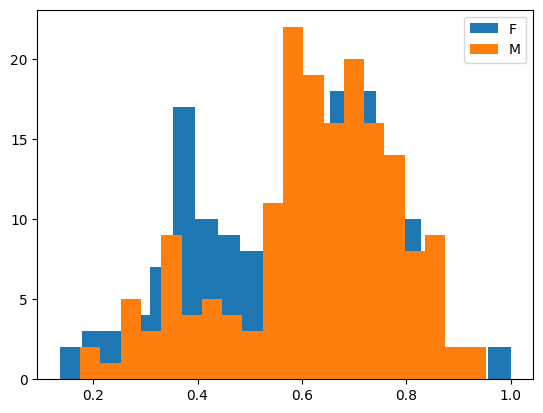

In [ ]:
plt.hist(nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='F'],bins=20)
plt.hist(nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='M'],bins=20)
plt.legend(['F','M'])
plt.show()

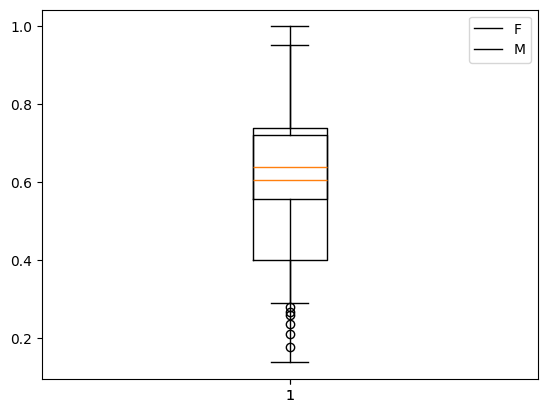

In [ ]:
plt.boxplot(nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='F'])
plt.boxplot(nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='M'])
plt.legend(['F','M'])
plt.show()

In [ ]:
# Both diagrams indicate a possible statistically significant differenece between the two genders.

In [ ]:
# H0: 'Mean fraction of same-gender neighbors for females' = 'Mean fraction of same-gender neighbors for males' . H1: =!

tstat, pval = stats.ttest_ind(nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='F'],nodes_class_gender_stats['same_gender%'][nodes_class_gender_stats['gender']=='M'])
print('pval:',pval)

pval: 0.005203329740046196


In [ ]:
# As pval = 0.005 <0.01 : We reject the H0 at 0.01 significance level, concluding that the difference is statistically significant.

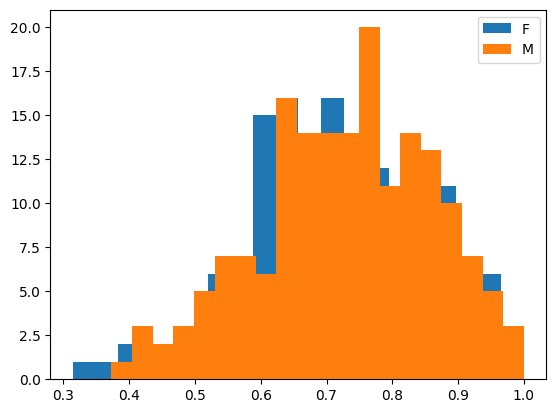

In [ ]:
# Concerning the mean fraction of same-gender neighbors for boys and girls:
plt.hist(nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='F'],bins=20)
plt.hist(nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='M'],bins=20)
plt.legend(['F','M'])
plt.show()

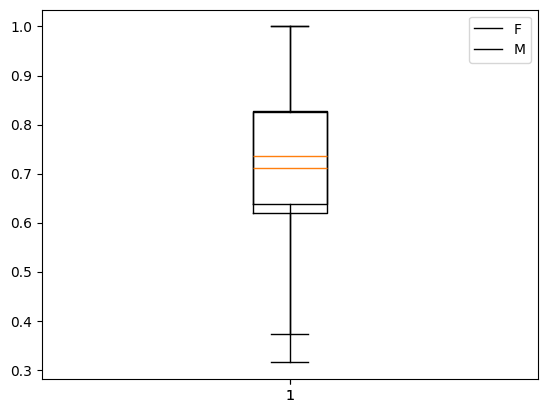

In [ ]:
plt.boxplot(nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='F'])
plt.boxplot(nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='M'])
plt.legend(['F','M'])
plt.show()

In [ ]:
# Now there is no profound difference from the diagrams.

# H0: 'Mean fraction of same-class neighbors for females' = 'Mean fraction of same-class neighbors for males' . H1: =!

tstat, pval = stats.ttest_ind(nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='F'],nodes_class_gender_stats['same_class%'][nodes_class_gender_stats['gender']=='M'])
print('pval:',pval)

pval: 0.3280595838840332


In [ ]:
# As pval>>0.01, we fail to reject the H0. The differnece is not statistically significant.

## Part 3. Community Detection  (20 Points)

Let us now look at the communities whithin the global network.

Ideally, we would expect that the communities would correspond to classes; i.e., we expect that each community corresponds to a class (thus, there is a one-to-one mapping between communities and classes.)

Let us see if this assumption is true.

1. First, find the communities using the Greedy Modularity Maximization algorithm.
    - How many communities you find? Could they correspond to classes?
    - Find the modularity of this set of communities.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
print('number of communities:',len(greedy_modularity_communities(G)))
for i in range(len(greedy_modularity_communities(G))):
  print('number of students incommunity',i+1,':',len(greedy_modularity_communities(G)[i]))

number of communities: 3
number of students incommunity 1 : 116
number of students incommunity 2 : 110
number of students incommunity 3 : 101


In [ ]:
# We see that all students are devided in 3 big communities of similar size.
# Those communities cannot correspond to the classes(which are more and of less size each)

In [ ]:
# To estimate the quality of the particular clustering#
# we calculate its 'modularity' (which is a measure of internal cohesion and external seperation):
from networkx.algorithms.community import modularity
print('modularity:',modularity(G,greedy_modularity_communities(G)))

modularity: 0.5407488684197559


2. Second, find the communities using the InfoMap algorithm (use "--seed 31" as argument).
    - How many communities you find?
    - Find the modularity of this set of communities. How do you compare it to the previous one (found using GMM algorithm)?
    - Check whether those communities do indeed correspond to classes. (Hint: add the node's community as a new column in the nodes dataframe, then proceed..).

In [ ]:
!pip install infomap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.8/264.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.8.0-cp311-cp311-linux_x86_64.whl size=7698804 sha256=8a731539edd79ffe2258cad92e360e1076b0b21047a3e89f0d8b5eab654f9f88
  Stored in directory: /root/.cache/pip/wheels/f2/07/de/ee649642ec15485c0eaf89c9f06eb4f19a9b45e744e6808a8d
Successfully built infomap


In [ ]:
from infomap import Infomap
im = Infomap(seed=31)
im.add_links(G.edges())
im.run();
print('number of communities:', im.num_top_modules)
node_coms = im.get_modules()
comms = {}
for n,c in node_coms.items():
  comms[c] = comms.get(c,[]) + [n]
comms
list=[]
for i in comms.keys():
  list.append(comms[i])
list
modularity(G=G,communities=list)
print('modularity:',modularity(G=G,communities=list))

number of communities: 7
modularity: 0.5818189563783098


In [ ]:
# As the modularity of the communities resulted from this method is greater than
# the the modularity of the previous method --> This is a vital choice as well (if not even beter)
# As the number of actual classes is 9
# As the number of communities(7) resulted from InfoMap model are close to
# the number of the actual classes(9) --> There maybe (partial) correspondence between them.

In [ ]:
list=[]
for key in comms.keys():
 for id in comms[key]:
  list.append((id,key))
df = pd.DataFrame(list,columns=['id','community'])
nodes_class_gender_stats = nodes_class_gender_stats.merge(df,on='id')
nodes_class_gender_stats

,id,class,gender,degree,clustering,ecc,closeness,betweenness,n_same_gender,n_same_class,same_gender%,same_class%,community
0,650,2BIO1,F,39,0.430499,3,0.445964,0.002183,33,27,0.846154,0.692308,6
1,498,2BIO1,F,44,0.392178,3,0.459803,0.005193,28,27,0.636364,0.613636,6
2,627,2BIO1,F,22,0.640693,3,0.408010,0.000221,17,21,0.772727,0.954545,6
3,857,2BIO1,F,24,0.525362,3,0.420103,0.001025,19,20,0.791667,0.833333,6
4,487,2BIO1,F,40,0.412821,3,0.491704,0.003989,29,25,0.725000,0.625000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,58,PC*,Unknown,52,0.406486,3,0.522436,0.008098,1,33,0.019231,0.634615,4
323,209,PC*,Unknown,18,0.797386,4,0.395152,0.000077,1,18,0.055556,1.000000,4
324,979,2BIO2,Unknown,20,0.652632,4,0.405473,0.000142,0,17,0.000000,0.850000,1
325,205,2BIO3,M,39,0.481781,3,0.476608,0.002619,13,29,0.333333,0.743590,1


In [ ]:
classes_VS_communities = nodes_class_gender_stats[['id','class','community']]
classes_VS_communities.groupby(['community','class']).count()

id
community class    
1         2BIO2  34
          2BIO3  40
2         MP*1   29
          MP*2   38
3         PC     44
4         PC*    39
5         MP     33
6         2BIO1  36
7         PSI*   34

In [ ]:
# We observe:
# community 1 consists from classes 2BIO2,2BIO3
# communite 2 consists from classes MP*1, MP*2
# one-to-one correspondence betweens communities 3,4,5,6,7 and classes PC,PC*,MP,2BIO1.PSI*


## Part 4. Network Evolution  (20 Points)

Now, we will look at how our network evolved over time.
We should get back to our original contacts dataframe that includes the dimension: date.
We will create accummulated snapshots of the network at every day.

1. Make an integer encoding of the 5 dates (0, 1, ..., 4).

In [ ]:
date_dict = {}
for date_index in range(len(contacts['date'].unique())):
  date_dict[contacts['date'].unique()[date_index]] = date_index
date_dict
contacts['date_index'] = contacts['date'].apply(lambda x: date_dict[x])
cont = contacts[['i','j','date_index']]
cont


,i,j,date_index
0,454,640,0
1,1,939,0
2,185,258,0
3,55,170,0
4,9,453,0
...,...,...,...
11208,9,120,4
11209,525,687,4
11210,219,687,4
11211,280,513,4


2. Create a function that takes as parameter a date-encoding integer (0 to 4), and returns the list of edges of that occured UP to, and including that date. That is:
    - for first date, 0, return edges of date 0 only,
    - for second date, 1, return edges of dates 0 and 1,
    - for third date, 2, return edges of dates 0, 1 and 2,
    - and so on.
    * the last one should include all edges, right?

In [ ]:
def list_of_edges(z):
  cont_filtered = cont[['i','j']][cont['date_index'] <= z]
  unique_edges = cont_filtered.drop_duplicates().reset_index()
  edge_list = []
  for x  in range(len(unique_edges)):
    edge_list.append((unique_edges['i'][x],unique_edges['j'][x]))
  return edge_list

In [ ]:
for z in range(5):
  print('number of edges on date',z,':',len(list_of_edges(z)))

number of edges on date 0 : 2242
number of edges on date 1 : 3768
number of edges on date 2 : 4576
number of edges on date 3 : 5304
number of edges on date 4 : 5818


3. Using the previous function to get the edges, create a list of 5 graphs.
Notice that those graphs are accumulative snanpshots of our global network, i.e., each of which corresponds to the network status up to the corresponding date.

In [ ]:
g = []
for z in range(5):
  g.append(nx.Graph())
  g[z].add_edges_from(list_of_edges(z))



4. Create a function, `analyze`, that takes a graph `G` as parameter, and calculates the following measures:
    - `n`: number of nodes
    - `m`: number of edges
    - `dn`: density
    - `tr`: transitivity
    - `avg_cls`: average clustering coefficient
    - `avg_path`: average shortest path length

In [ ]:
def analyze(G):
  n = G.number_of_nodes()
  m = G.number_of_edges()
  dn = nx.density(G)
  tr = nx.transitivity(G)
  avg_cls = nx.average_clustering(G)
  avg_path = nx.average_shortest_path_length(G)
  return n,m,dn,tr,avg_cls,avg_path

In [ ]:
for z in range(5):
  print('date',z,':',analyze(g[z]))

date 0 : (312, 2242, 0.04621155907329541, 0.3555175895006601, 0.40108080386519857, 2.90129029598483)
date 1 : (326, 3768, 0.07112789051439358, 0.40522208228795825, 0.45952639838350934, 2.4729211892402074)
date 2 : (327, 4576, 0.08585204780398116, 0.4285536297690902, 0.48276786266252647, 2.341663383426202)
date 3 : (327, 5304, 0.09951032813643271, 0.429800002058651, 0.4914377391458142, 2.2177820303559033)
date 4 : (327, 5818, 0.10915367441511416, 0.44442135612150807, 0.5035048191728446, 2.1594341569576554)


5. Use this function `analyze` over the list of graph snapshots created in step 3. Arrange the results in a dataframe, which should look like:

|   |   n |    m |       dn |       tr |  avg_cls | avg_path |  
|--:|----:|-----:|---------:|---------:|---------:|---------:|
| 0 | 312 | 2242 | 0.046212 | 0.355518 | 0.401081 | 2.901290 |  
| 1 | ... | ...  | ...      | ...      | ...      | ...      |


In [ ]:
graph_snapshots = []
for z in range(5):
  graph_snapshots.append(analyze(g[z]))
graph_snapshots_df = pd.DataFrame (graph_snapshots, columns=['n', 'm', 'dn' , 'tr', 'avg_cls', 'avg_path'])
graph_snapshots_df


,n,m,dn,tr,avg_cls,avg_path
0,312,2242,0.046212,0.355518,0.401081,2.901290
1,326,3768,0.071128,0.405222,0.459526,2.472921
2,327,4576,0.085852,0.428554,0.482768,2.341663
3,327,5304,0.099510,0.429800,0.491438,2.217782
4,327,5818,0.109154,0.444421,0.503505,2.159434


6. Make a 2 by 2 subplots, each subplot shows the evolution over time of one of these four measures: density, transitivity, average clustering coefficient, and average shortest path length. Describe what you observe.

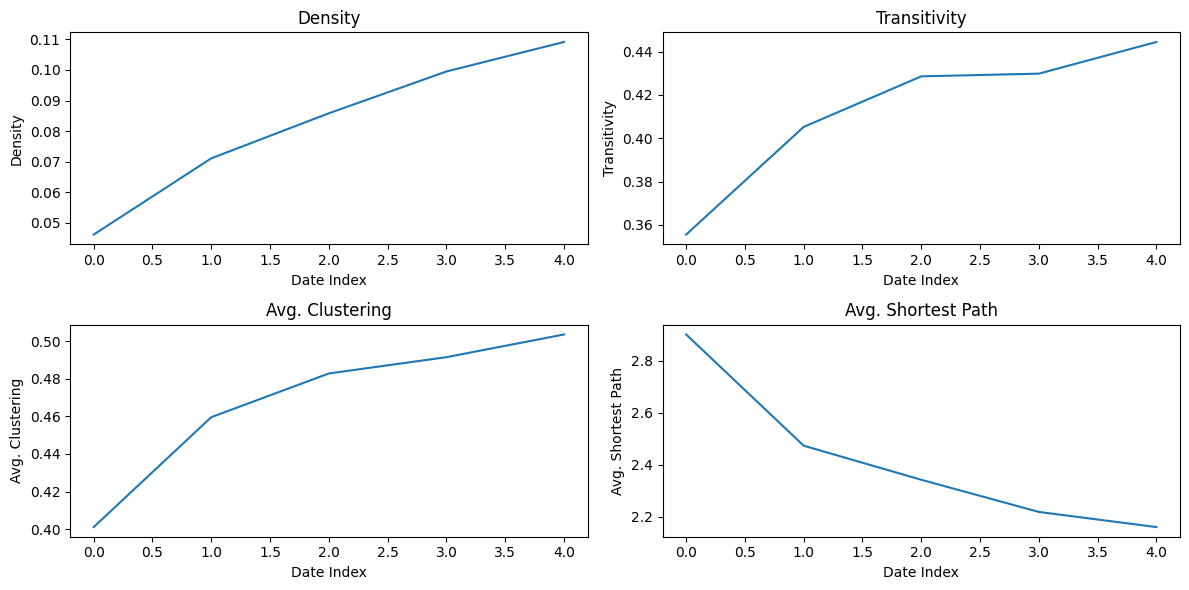

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes = axes.flatten()


plot_data = {'dn': 'Density', 'tr': 'Transitivity', 'avg_cls': 'Avg. Clustering', 'avg_path': 'Avg. Shortest Path'}
for i, metric in enumerate(plot_data):
    axes[i].plot(graph_snapshots_df.index, graph_snapshots_df[metric])
    axes[i].set_title(plot_data[metric])  # Set subplot title
    axes[i].set_xlabel('Date Index')  # Set x-axis label
    axes[i].set_ylabel(plot_data[metric])  # Set y-axis label

plt.tight_layout()

plt.show()

In [ ]:
# As time passes the network increases its nodes(slightly) but even more rapidly its edges.
#Thus, day by day it becomes more interconnected, fact that explains the
# density,avg clustering,transitivity increase with time
# avg shortest path decrease with time.